# Analysis of Kochi Suburbs

In [1]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

print('Folium installed')
print('Libraries imported.')


Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    geopy-1.22.0               |     pyh9f0ad1d_0          63 KB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    certifi-2020.4.5.1         |   py36h9f0ad1d_0         151 KB  conda-forge
    ca-certificates-2020.4.5.1 |       hecc5488_0         146 KB  conda-forge
    openssl-1.1.1g             |       h516909a_0         2.1 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.5 MB

The following NEW packages will be INSTALLED:

    geographiclib:   1.50-py_0           conda-forge
    geopy:          

In [2]:
# The code was removed by Watson Studio for sharing.

,Unnamed: 0,Address,Latitude,Longitude
0,0,Elamakkara,10.017068,76.292086
1,1,Kaloor,9.967339,76.299929
2,2,Palarivattom,10.002527,76.306206
3,3,Edapally,10.028576,76.310089
4,4,High Court Junction,9.983803,76.274017


In [3]:
CLIENT_ID = 'TUUNZWRTEIFAWLUINZSQYU0J1EEYS12ROSXAVEGSWNWECO5I' # your Foursquare ID
CLIENT_SECRET = 'JRGYNDNUC0UDJTDYC5AW5KRU3TUVJK10BOTVVBAX3WP1APF5' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: TUUNZWRTEIFAWLUINZSQYU0J1EEYS12ROSXAVEGSWNWECO5I
CLIENT_SECRET:JRGYNDNUC0UDJTDYC5AW5KRU3TUVJK10BOTVVBAX3WP1APF5


In [4]:
def getNearbyVenues(names, latitudes, longitudes, radius=1000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [5]:
df_Kochi=df_data_0

In [6]:
LIMIT = 100 # limit of number of venues returned by Foursquare API

radius = 1000 # define radius

In [7]:
Kochi_venues = getNearbyVenues(names=df_Kochi['Address'],
                                   latitudes=df_Kochi['Latitude'],
                                   longitudes=df_Kochi['Longitude']
                                  )

Elamakkara
Kaloor
Palarivattom
Edapally
High Court Junction
Panampilly Nagar
Gandhi Nagar
Ravipuram
Pachalam
Kadavanthra
Kaloor
Ravipuram
Ernakulam South
Marine Drive
Willingdon Island
Fort Kochi
Mattancherry
Thoppumpady
Palluruthy
Chellanam
Kundannur
Edakochi
Thevara
Maradu
Thykoodam
Kakkanad
Vennala
Thrikkakara
Vyttila
Kalamassery
Aluva
Angamaly
Eloor
Vaduthala
Vypin Island
Kumbalam
Aroor
Perumbavoor
Kolenchery
Piravom
Moovattupuzha
Kodungallur
Cherthala


In [8]:
print(Kochi_venues.shape)
Kochi_venues.head()

(789, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Elamakkara,10.017068,76.292086,Best Bakers,10.019222,76.291590,Bakery
1,Elamakkara,10.017068,76.292086,Devi Books,10.019272,76.291800,Bookstore
2,Elamakkara,10.017068,76.292086,Best Bakers,10.010982,76.288722,Bakery
3,Elamakkara,10.017068,76.292086,Reliance Fresh,10.010083,76.293445,Department Store
4,Elamakkara,10.017068,76.292086,freshmart,10.024886,76.296379,Bakery


Let's check how many venues were returned for each neighborhood

In [9]:
Kochi_Count = Kochi_venues.groupby('Neighborhood').count().sort_values('Neighborhood Latitude', axis=0, ascending=False, inplace=False, kind='quicksort', na_position='last')
Kochi_Count.head(5)

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Ravipuram,96,96,96,96,96,96
Kaloor,78,78,78,78,78,78
Eloor,65,65,65,65,65,65
Panampilly Nagar,55,55,55,55,55,55
Ernakulam South,54,54,54,54,54,54


Let's find out how many unique categories can be curated from all the returned venues¶

In [10]:
print('There are {} uniques categories.'.format(len(Kochi_venues['Venue Category'].unique())))

There are 110 uniques categories.


## Analyze Each Suburb

In [11]:
# one hot encoding
Kochi_onehot = pd.get_dummies(Kochi_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
Kochi_onehot['Neighborhood'] = Kochi_venues['Neighborhood'] 
#TVM_onehot['Latitude'] = TVM_venues['Neighborhood Latitude'] 
#TVM_onehot['Longitude'] = TVM_venues['Neighborhood Longitude'] 

# move neighborhood column to the first column
fixed_columns = [Kochi_onehot.columns[-1]] + list(Kochi_onehot.columns[:-1])
Kochi_onehot = Kochi_onehot[fixed_columns]

Kochi_onehot.head()

,Vegetarian / Vegan Restaurant,ATM,Accessories Store,Airport,American Restaurant,Arcade,Art Gallery,Art Museum,Asian Restaurant,Athletics & Sports,...,Sporting Goods Shop,Sports Bar,Stadium,Supermarket,Sushi Restaurant,Tea Room,Thai Restaurant,Theater,Train,Train Station
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [13]:
Kochi_grouped = Kochi_onehot.groupby('Neighborhood').mean().reset_index()
Kochi_grouped.head(5)

,Neighborhood,Vegetarian / Vegan Restaurant,ATM,Accessories Store,Airport,American Restaurant,Arcade,Art Gallery,Art Museum,Asian Restaurant,...,Sporting Goods Shop,Sports Bar,Stadium,Supermarket,Sushi Restaurant,Tea Room,Thai Restaurant,Theater,Train,Train Station
0,Aluva,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
1,Angamaly,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
2,Aroor,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.166667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
3,Cherthala,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.25
4,Edakochi,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00


Let's print each neighborhood along with the top 5 most common venues

In [14]:
num_top_venues = 5

for hood in Kochi_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = Kochi_grouped[Kochi_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Aluva----
                 venue  freq
0    Indian Restaurant  0.25
1             Bus Line  0.12
2  Fried Chicken Joint  0.12
3             Platform  0.12
4          Flea Market  0.12


----Angamaly----
               venue  freq
0          Multiplex   0.4
1  Indian Restaurant   0.2
2              Hotel   0.2
3        Bus Station   0.2
4  Mobile Phone Shop   0.0


----Aroor----
              venue  freq
0        Restaurant  0.33
1     Boat or Ferry  0.17
2       Coffee Shop  0.17
3  Asian Restaurant  0.17
4            Bakery  0.17


----Cherthala----
                venue  freq
0       Train Station  0.25
1            Bus Line  0.25
2           Rest Area  0.25
3  Seafood Restaurant  0.25
4     Motorcycle Shop  0.00


----Edakochi----
               venue  freq
0         Playground  0.17
1  Indian Restaurant  0.17
2               Café  0.17
3                Gym  0.17
4      Burrito Place  0.17


----Edapally----
                  venue  freq
0     Indian Restaurant  0.14
1  Fast Foo

Let's put that into a pandas dataframe

In [15]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Now let's create the new dataframe and display the top 5 venues for each neighborhood.

In [16]:
num_top_venues = 5

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = Kochi_grouped['Neighborhood']
#neighborhoods_venues_sorted['Latitude'] = TVM_venues['Neighborhood Latitude'] 
#neighborhoods_venues_sorted['Longitude'] = TVM_venues['Neighborhood Longitude'] 

for ind in np.arange(Kochi_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Kochi_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Aluva,Indian Restaurant,Bus Line,Fried Chicken Joint,Flea Market,Bakery
1,Angamaly,Multiplex,Hotel,Indian Restaurant,Bus Station,Flea Market
2,Aroor,Restaurant,Coffee Shop,Boat or Ferry,Asian Restaurant,Bakery
3,Cherthala,Train Station,Seafood Restaurant,Bus Line,Rest Area,Comfort Food Restaurant
4,Edakochi,Indian Restaurant,Playground,Gym,Café,Burrito Place


In [17]:
neighborhoods_venues_sorted['Latitude'] = df_Kochi['Latitude'] 
neighborhoods_venues_sorted['Longitude'] = df_Kochi['Longitude']
neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,Latitude,Longitude
0,Aluva,Indian Restaurant,Bus Line,Fried Chicken Joint,Flea Market,Bakery,10.017068,76.292086
1,Angamaly,Multiplex,Hotel,Indian Restaurant,Bus Station,Flea Market,9.967339,76.299929
2,Aroor,Restaurant,Coffee Shop,Boat or Ferry,Asian Restaurant,Bakery,10.002527,76.306206
3,Cherthala,Train Station,Seafood Restaurant,Bus Line,Rest Area,Comfort Food Restaurant,10.028576,76.310089
4,Edakochi,Indian Restaurant,Playground,Gym,Café,Burrito Place,9.983803,76.274017


## Cluster Neighborhoods

Run k-means to cluster the neighborhood into 5 clusters.

In [18]:
# import k-means from clustering stage
from sklearn.cluster import KMeans

In [19]:
# set number of clusters
kclusters = 3

Kochi_grouped_clustering = Kochi_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Kochi_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([1, 1, 0, 1, 1, 1, 0, 1, 1, 1], dtype=int32)

Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

In [20]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

#manhattan_merged = manhattan_data

# Rename the dataframe to TVM_merged
Kochi_merged = neighborhoods_venues_sorted

Kochi_merged.head() # check the last columns!

,Cluster Labels,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,Latitude,Longitude
0,1,Aluva,Indian Restaurant,Bus Line,Fried Chicken Joint,Flea Market,Bakery,10.017068,76.292086
1,1,Angamaly,Multiplex,Hotel,Indian Restaurant,Bus Station,Flea Market,9.967339,76.299929
2,0,Aroor,Restaurant,Coffee Shop,Boat or Ferry,Asian Restaurant,Bakery,10.002527,76.306206
3,1,Cherthala,Train Station,Seafood Restaurant,Bus Line,Rest Area,Comfort Food Restaurant,10.028576,76.310089
4,1,Edakochi,Indian Restaurant,Playground,Gym,Café,Burrito Place,9.983803,76.274017


In [21]:
import matplotlib.cm as cm
import matplotlib.colors as colors

In [22]:
# create map

Latitude = 10.002527
Longitude = 76.3
map_clusters = folium.Map(location=[Latitude, Longitude], zoom_start=11)



# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Kochi_merged['Latitude'], Kochi_merged['Longitude'], Kochi_merged['Neighborhood'], Kochi_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## Examine Clusters

In [23]:
Kochi_merged.loc[Kochi_merged['Cluster Labels'] == 0, Kochi_merged.columns[[1] + list(range(2, Kochi_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,Latitude,Longitude
2,Aroor,Restaurant,Coffee Shop,Boat or Ferry,Asian Restaurant,Bakery,10.002527,76.306206
6,Elamakkara,Bakery,Department Store,Bookstore,Train Station,Flea Market,9.934074,76.260630
10,Gandhi Nagar,Restaurant,Fish Market,Harbor / Marina,Gym,Fried Chicken Joint,9.967339,76.299929
26,Palluruthy,Bakery,Airport,Restaurant,Train Station,Flea Market,9.994968,76.315900
29,Piravom,Restaurant,Fish Market,Harbor / Marina,Gym,Fried Chicken Joint,10.044541,76.317178
32,Thoppumpady,Restaurant,Fish Market,Harbor / Marina,Gym,Fried Chicken Joint,9.977107,76.279920
33,Thrikkakara,Restaurant,Fish Market,Harbor / Marina,Gym,Fried Chicken Joint,10.013150,76.276762
35,Vaduthala,Bakery,Bus Station,Light Rail Station,Train Station,Food,9.890583,76.312375


In [24]:
Kochi_merged.loc[Kochi_merged['Cluster Labels'] == 1, Kochi_merged.columns[[1] + list(range(2, Kochi_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,Latitude,Longitude
0,Aluva,Indian Restaurant,Bus Line,Fried Chicken Joint,Flea Market,Bakery,10.017068,76.292086
1,Angamaly,Multiplex,Hotel,Indian Restaurant,Bus Station,Flea Market,9.967339,76.299929
3,Cherthala,Train Station,Seafood Restaurant,Bus Line,Rest Area,Comfort Food Restaurant,10.028576,76.310089
4,Edakochi,Indian Restaurant,Playground,Gym,Café,Burrito Place,9.983803,76.274017
5,Edapally,Indian Restaurant,Fast Food Restaurant,Multiplex,Clothing Store,Café,9.965506,76.294294
7,Eloor,Indian Restaurant,Fast Food Restaurant,Shopping Mall,Café,Hotel,9.959610,76.289858
8,Ernakulam South,Indian Restaurant,Café,Ice Cream Shop,Bakery,Hotel,10.001258,76.279076
9,Fort Kochi,Hotel,Seafood Restaurant,Café,Art Gallery,Indian Restaurant,9.966674,76.298158
11,High Court Junction,Indian Restaurant,Hotel,Shopping Mall,Ice Cream Shop,BBQ Joint,9.959610,76.289858
12,Kadavanthra,Bakery,Indian Restaurant,Ice Cream Shop,Platform,Fast Food Restaurant,9.964709,76.287607


In [25]:
Kochi_merged.loc[Kochi_merged['Cluster Labels'] == 2, Kochi_merged.columns[[1] + list(range(2, Kochi_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,Latitude,Longitude
23,Moovattupuzha,Bus Station,Train Station,Flea Market,Convenience Store,Dance Studio,9.939759,76.32863


In [26]:
Kochi_merged.loc[Kochi_merged['Cluster Labels'] == 3, Kochi_merged.columns[[1] + list(range(2, Kochi_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,Latitude,Longitude


In [42]:
Kochi_merged.loc[Kochi_merged['Cluster Labels'] == 4, Kochi_merged.columns[[1] + list(range(2, Kochi_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,Latitude,Longitude


In [43]:
Kochi_merged.loc[Kochi_merged['Cluster Labels'] == 5, Kochi_merged.columns[[1] + list(range(2, Kochi_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,Latitude,Longitude


In [44]:
Kochi_merged.loc[Kochi_merged['Cluster Labels'] == 6, Kochi_merged.columns[[1] + list(range(2, Kochi_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,Latitude,Longitude


In [45]:
Kochi_merged.loc[Kochi_merged['Cluster Labels'] == 7, Kochi_merged.columns[[1] + list(range(2, Kochi_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,Latitude,Longitude


In [36]:
Kochi_merged.loc[Kochi_merged['Cluster Labels'] == 8, Kochi_merged.columns[[1] + list(range(2, Kochi_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,Latitude,Longitude


In [37]:
Kochi_merged.loc[Kochi_merged['Cluster Labels'] == 9, Kochi_merged.columns[[1] + list(range(2, Kochi_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,Latitude,Longitude


In [27]:
Kochi_Count.head(5)

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Ravipuram,96,96,96,96,96,96
Kaloor,78,78,78,78,78,78
Eloor,65,65,65,65,65,65
Panampilly Nagar,55,55,55,55,55,55
Ernakulam South,54,54,54,54,54,54


In [28]:
# To remove unnecessary columns in TVM_Count

Kochi_Count = Kochi_Count.drop(['Neighborhood Latitude','Neighborhood Longitude','Venue Latitude','Venue Longitude','Venue Category'], axis=1)

In [32]:
# To rename Column name

Kochi_Count.rename(columns={'Venue':'Number of Venues'}, inplace=True)
Kochi_Count.head(5)

,Number of Venues
Neighborhood,
Ravipuram,96
Kaloor,78
Eloor,65
Panampilly Nagar,55
Ernakulam South,54


In [33]:
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

# np.histogram returns 2 values
count, bin_edges = np.histogram(Kochi_Count,4)

print(count) # frequency count
print(bin_edges) # bin ranges, default = 10 bins

[28  5  4  2]
[ 1.   24.75 48.5  72.25 96.  ]


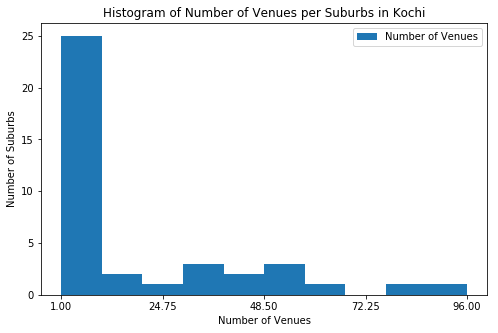

In [34]:
Kochi_Count.plot(kind='hist', figsize=(8, 5), xticks=bin_edges)

plt.title('Histogram of Number of Venues per Suburbs in Kochi') # add a title to the histogram
plt.ylabel('Number of Suburbs') # add y-label
plt.xlabel('Number of Venues') # add x-label

plt.show()

In [45]:
# add new labels based on number of venues

Kochi_Count['Category'] = [4 if x <= 10 else 3 if x <= 30 else 2 if x <= 60 else 1 for x in Kochi_Count['Number of Venues']] 

Kochi_Count

,Number of Venues,Category
Neighborhood,,
Ravipuram,96,1
Kaloor,78,1
Eloor,65,1
Panampilly Nagar,55,2
Ernakulam South,54,2
Marine Drive,53,2
Edapally,42,2
Kadavanthra,41,2
High Court Junction,36,2


In [46]:
Kochi_merged1 = pd.merge(Kochi_Count, Kochi_merged, left_on = 'Neighborhood', right_on = 'Neighborhood', how='left')

In [47]:
Kochi_merged1.head(5)

,Neighborhood,Number of Venues,Category,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,Latitude,Longitude
0,Ravipuram,96,1,1,Indian Restaurant,Café,Ice Cream Shop,Restaurant,Bakery,10.110095,76.349516
1,Kaloor,78,1,1,Indian Restaurant,Bakery,Ice Cream Shop,Chinese Restaurant,Clothing Store,9.965447,76.244950
2,Eloor,65,1,1,Indian Restaurant,Fast Food Restaurant,Shopping Mall,Café,Hotel,9.959610,76.289858
3,Panampilly Nagar,55,2,1,Indian Restaurant,Bakery,Ice Cream Shop,Café,Electronics Store,9.934074,76.260630
4,Ernakulam South,54,2,1,Indian Restaurant,Café,Ice Cream Shop,Bakery,Hotel,10.001258,76.279076


In [48]:
# To remove unnecessary columns in Kochi_merged1

Kochi_Map = Kochi_merged1.drop(['Number of Venues','Cluster Labels'], axis=1)

Kochi_Map.head(5)

,Neighborhood,Category,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,Latitude,Longitude
0,Ravipuram,1,Indian Restaurant,Café,Ice Cream Shop,Restaurant,Bakery,10.110095,76.349516
1,Kaloor,1,Indian Restaurant,Bakery,Ice Cream Shop,Chinese Restaurant,Clothing Store,9.965447,76.244950
2,Eloor,1,Indian Restaurant,Fast Food Restaurant,Shopping Mall,Café,Hotel,9.959610,76.289858
3,Panampilly Nagar,2,Indian Restaurant,Bakery,Ice Cream Shop,Café,Electronics Store,9.934074,76.260630
4,Ernakulam South,2,Indian Restaurant,Café,Ice Cream Shop,Bakery,Hotel,10.001258,76.279076


[ 3  7  0  4 25]
[1.  1.6 2.2 2.8 3.4 4. ]


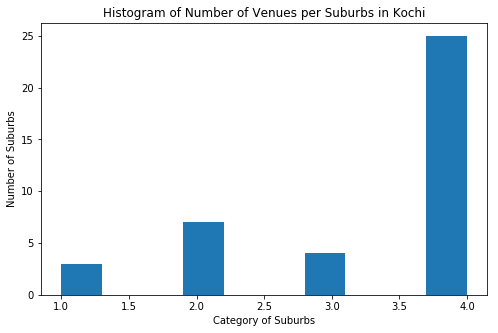

In [49]:
# np.histogram returns 2 values
count, bin_edges = np.histogram(Kochi_Map['Category'],5)

print(count) # frequency count
print(bin_edges) # bin ranges, default = 10 bins

Kochi_Map['Category'].plot(kind='hist', figsize=(8, 5))

plt.title('Histogram of Number of Venues per Suburbs in Kochi') # add a title to the histogram
plt.ylabel('Number of Suburbs') # add y-label
plt.xlabel('Category of Suburbs') # add x-label

plt.show()

In [50]:
# create map

kclusters=4
Latitude = 10.002527
Longitude = 76.3
map_clusters = folium.Map(location=[Latitude, Longitude], zoom_start=11)



# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Kochi_Map['Latitude'], Kochi_Map['Longitude'], Kochi_Map['Neighborhood'], Kochi_Map['Category']):
    label = folium.Popup(str(poi) + ' Category ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=1).add_to(map_clusters)
       
map_clusters